# Active Layer Evaluation

This script contains the development of the figures to evaluate the performance of the active layer compared with the original IFC model.

In [7]:
%matplotlib inline 
import numpy as np 
import pylab as pl 
import pandas as pd 
from ifis_tools import series_tools as ser
from aclayer import core

In [4]:
Me = pd.read_msgpack('data/results/Events_Metrics_sce.msg')

In [5]:
colors = ['#52270C','#A1623B','#E7A011','#F3DE0A']

# Qpeak Differences

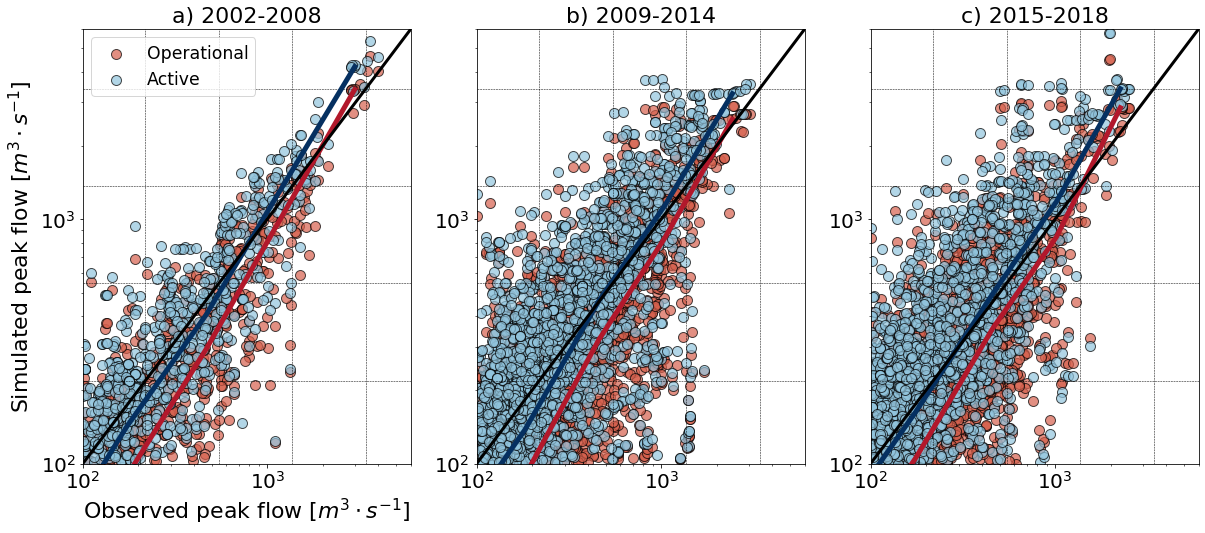

In [11]:
bins = []
val = 50
bins.append(val)
for i in range(5):
    val *= 2.5
    bins.append(val)
bins = np.array(bins)
bins2 = (bins[:-1]+bins[1:])/2.

fig = pl.figure(figsize=(20,8))
cont = 1
pre = ''
name = ['a)','b)','c)','d)','e)','f)','g)','h)','i)']
for y1,y2 in zip([2002,2009,2015],[2008,2014,2018]):
    y1t = str(y1)
    y2t = str(y2)
    
    for model,co in zip(['a-hlm'],[colors[2],colors[-1],colors[1]]):
        ax = fig.add_subplot(1,3,cont)

        a,b,idx = core.get_intersec('qpeak', 'usgs','ifc-hlm',Me, y1t,y2t)
        po,ps = core.percentiles(a['qpeak'].loc[idx], b['qpeak'].loc[idx], bins = bins)
        po2,ps2 = core.percentiles(a['qpeak'].loc[idx], a['qpeak'].loc[idx], bins = bins)
        c1 = a['qpeak'].loc[idx].values
        c2 = b['qpeak'].loc[idx].values
        p = np.where((c1>100) & (c2 > 100))[0]
        ax.scatter(c1[p],c2[p], c = '#d6604d',s = 100, edgecolors='k', alpha = 0.7, label = pre+'Operational')
        ax.plot(ps2,ps, '#b2182b',lw = 5)

        a,b,idx = core.get_intersec('qpeak', 'usgs',model,Me,y1t,y2t)
        po,ps = core.percentiles(a['qpeak'].loc[idx], b['qpeak'].loc[idx], bins = bins)
        c1 = a['qpeak'].loc[idx].values
        c2 = b['qpeak'].loc[idx].values
        p = np.where((c1>100) & (c2 > 100))[0]
        ax.scatter(c1[p],c2[p], c = '#92c5de',s = 100, edgecolors='k', alpha = 0.7, label = pre+'Active')
        ax.plot(ps2,ps, '#053061',lw = 5)

        pl.loglog([5,6000],[5,6000], 'k', lw = 3)
        ax.set_title(name[cont-1]+' '+y1t+'-'+y2t, size = 22)
        ax.set_xlim(100,6000)
        ax.set_ylim(100,6000)
        ax.vlines(bins2, 100,6000, lw = 0.5, ls = '--')
        ax.hlines(bins2, 100,6000, lw = 0.5, ls = '--')
        ax.tick_params(labelsize = 20)
        if cont == 1:
            ax.legend(loc = 0, fontsize = 'xx-large')

        if cont == 1:  
            ax.set_ylabel('Simulated peak flow [$m^3 \cdot s^{-1}$]', size = 22)
            ax.set_xlabel('Observed peak flow [$m^3 \cdot s^{-1}$]', size = 22)
        if cont == 2:
            pre = '_'
        cont+=1
pl.savefig('figures/Peak_active_vs_operational.png', bbox_inches = 'tight')

# Histograms of performance metrics

In [30]:
#exports
def plot_hist2d(ax, Met, prod1, prod2, metric='kge',x1=-1,x2=1,y = 2016,cmap = False, 
                vmin = 0, vmax = 10000, cmin = 0, cmax = 10000):
    '''Make a 2d hist plot of a metric using two products from the metrics file.'''
    #Get the intersection
    B = Met.loc[y]
    a = B[[metric,'link']][B['product'] == prod1]
    b = B[[metric,'link']][B['product'] == prod2]
    idx = a.index.intersection(b.index)
    #Make the plot
    pl.hist2d(a.loc[idx][metric], b.loc[idx][metric], cmap = pl.get_cmap('coolwarm'),
              bins=np.linspace(x1,x2,30), cmin = cmin, cmax = cmax, vmin = vmin, vmax = vmax)
    
    if cmap:
        cmap = pl.colorbar(orientation = 'horizontal', pad = 0.15)
        cmap.ax.tick_params(labelsize = 20)
    #cmap.set_ticks(t)
    ax.plot([x1,x2], [x1,x2], c = 'k', lw = 2)
    ax.tick_params(labelsize = 21)
    ax.set_xlim(x1,x2)
    ax.set_ylim(x1,x2)
    ax.set_xlabel(prod1, size = 21)
    ax.set_ylabel(prod2, size = 21)
    ax.set_title(prod2+' vs '+prod1, size = 23)
    return ax, cmap

In [13]:
Ymet = pd.read_msgpack('data/results/Yearly_Metrics_sce.msg')

/Users/nicolas/.local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7080: RuntimeWarning:

invalid value encountered in greater



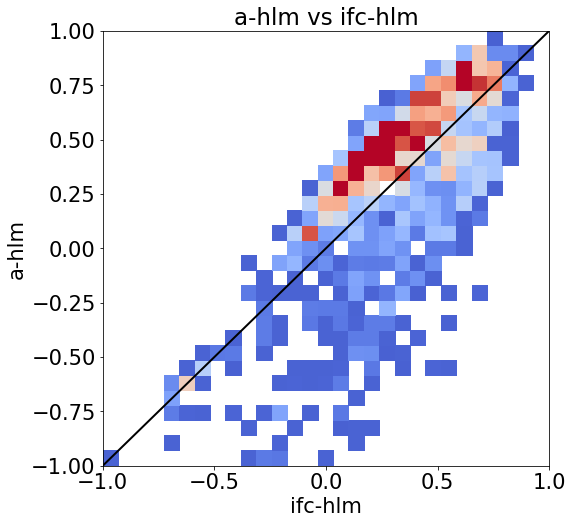

In [31]:
fig = pl.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = plot_hist2d(ax, Ymet, 'ifc-hlm','a-hlm', y=np.arange(2008,2019), vmin = 1, vmax = 2500, cmin = 1)

/Users/nicolas/.local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7080: RuntimeWarning:

invalid value encountered in greater



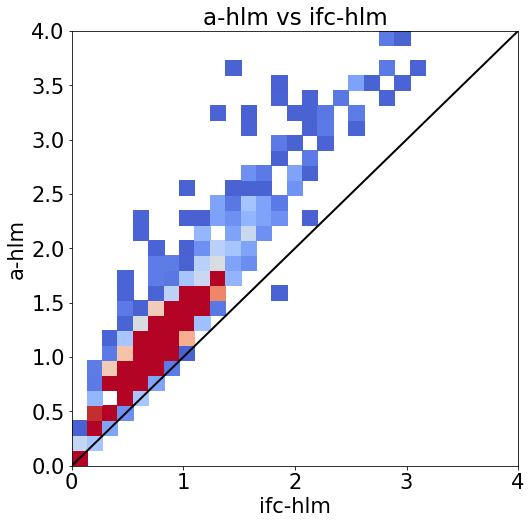

In [37]:
fig = pl.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = plot_hist2d(ax, Ymet, 'ifc-hlm','a-hlm', x1 = 0.0, x2 = 4.0,
    y=np.arange(2008,2019), metric='stdRatio',vmin = 1, vmax = 2500, cmin = 1)

In [36]:
Ymet.head()

,product,kge,nse,vol,pbias,Hits,PeakDif,Qpeak,corr,best_corr,moves,meanRatio,stdRatio,Misses,link
2008,usgs,1.0,1.0,233017.174133,-0.0,1.0,0.0,760.3060,1.0,1.0,0,1.0,1.0,0.0,279554
2009,usgs,1.0,1.0,161455.760904,-0.0,1.0,0.0,338.3860,1.0,1.0,0,1.0,1.0,0.0,279554
2010,usgs,1.0,1.0,342954.078335,-0.0,1.0,0.0,551.4700,1.0,1.0,0,1.0,1.0,0.0,279554
2011,usgs,1.0,1.0,123070.611515,-0.0,1.0,0.0,181.5815,1.0,1.0,0,1.0,1.0,0.0,279554
2012,usgs,1.0,1.0,78513.364236,-0.0,1.0,0.0,308.6530,1.0,1.0,0,1.0,1.0,0.0,279554
